In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("dsjobs_india_cleaned.csv")

In [29]:
#New line of code to correct a specific float attribute error in Job Description {AttributeError: 'float' object has no attribute 'lower'}
df['Job Description'] = df['Job Description'].astype(str) 

In [30]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,-1,Job Description – Data Scientist\n\nLocation: ...,3.6,Buckman\n3.6,Chennai,"Memphis, TN",1001 to 5000 employees,1945,Company - Private,...,-1,Buckman\n,Chennai,0,75,1,1,0,0,0
1,Data Scientist,-1,Overview\n\n\nWe have an exciting opportunity ...,4.0,Quanticate\n4.0,Bengaluru,"Hitchin, United Kingdom",201 to 500 employees,1995,Company - Private,...,"GCE Solutions, Parexel, IQVIA",Quanticate\n,Bengaluru,0,25,1,1,0,0,0
2,Senior Data Scientist,-1,Company Overview\n\nFanatics is the global lea...,3.3,Fanatics\n3.3,Hyderabad,"Jacksonville, FL",5001 to 10000 employees,1996,Company - Private,...,"Lids, Amazon, Under Armour",Fanatics\n,Hyderabad,0,24,1,1,1,0,1
3,Data Scientist,-1,Role: Data Scientist\n\nLocation: Bangalore\n\...,4.1,Dell\n4.1,Bengaluru,"Round Rock, TX",10000+ employees,1984,Company - Public,...,"IBM, Apple, HP Inc.",Dell\n,Bengaluru,0,36,1,1,0,1,1
4,Data Scientist,-1,Provide analytical insights into emerging prob...,3.4,PayPal\n3.4,Bengaluru,"San Jose, CA",10000+ employees,1998,Company - Public,...,"Square, Amazon, Apple",PayPal\n,Bengaluru,0,22,1,1,0,0,0


In [45]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'descr_length', 'comp_count'],
      dtype='object')

In [32]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title 

In [33]:
 df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [34]:
df.job_simp.value_counts()

data scientist    456
Name: job_simp, dtype: int64

In [35]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        332
senior    121
jr          3
Name: seniority, dtype: int64

In [36]:
#Fixing state names if any of them are faulty
#df['job_state']=df.hq_country.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df.job_state.value_counts()

Bengaluru             182
Hyderabad              47
Mumbai                 43
Pune                   36
Chennai                35
India                  20
Gurgaon                20
New Delhi              16
Noida                   8
Thiruvananthapuram      7
Chandigarh              6
Maharashtra             5
Ahmedabad               4
Karnataka               3
Indore                  2
Bhopal                  2
Bhubaneswar             2
Jamshedpur              1
Nagpur                  1
Visakhapatnam           1
Andhra Pradesh          1
Surat                   1
Neem-Ka-Thana           1
Dhaka                   1
Tiruchchirappalli       1
Kochi                   1
Barabanki               1
Kozhikode               1
Mangalore               1
Coimbatore              1
Ranchi                  1
Noklak Hq               1
Odisha                  1
Manesar                 1
Ernakulam               1
Name: job_state, dtype: int64

In [39]:
#Job description length
df['descr_length']=df['Job Description'].apply(lambda x: len(x))

#New line of code to correct a specific float attribute error in Job Description {AttributeError: 'float' object has no attribute 'lower'}
df['descr_length']

0      4237
1      2405
2      5148
3      5583
4      1452
       ... 
451    2580
452    2478
453    3055
454    5798
455    1168
Name: descr_length, Length: 456, dtype: int64

In [41]:
#Competitor Count - Finding the number of competitors by separating the text using commas and making -1 as 0
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

In [42]:
df['comp_count']

0      0
1      3
2      3
3      3
4      3
      ..
451    3
452    0
453    0
454    3
455    0
Name: comp_count, Length: 456, dtype: int64

In [47]:
#Hourly wage to Annual
#df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
#df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)
#Before executing this remember to create the hourly column from previous tutorial 3

In [50]:
#Remove new line character from Job title (removing "\n")
df.company_txt

0                 Buckman\n
1              Quanticate\n
2                Fanatics\n
3                    Dell\n
4                  PayPal\n
               ...         
451            Freshworks\n
452            CareerXperts
453    HR Inc Consultants\n
454                 Zycus\n
455               MY Search
Name: company_txt, Length: 456, dtype: object

In [51]:
df['company_txt'] = df['company_txt'].apply(lambda x:x.replace('\n',''))

In [53]:
df['company_txt'] #Here you can see that the "\n" is removed from the fields

0                 Buckman
1              Quanticate
2                Fanatics
3                    Dell
4                  PayPal
              ...        
451            Freshworks
452          CareerXperts
453    HR Inc Consultants
454                 Zycus
455             MY Search
Name: company_txt, Length: 456, dtype: object

In [54]:
df.describe()

,Salary Estimate,Rating,Founded,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,descr_length,comp_count
count,456.0,456.000000,456.000000,456.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,-1.0,2.849561,1198.225877,0.0,19.182018,0.791667,0.995614,0.333333,0.175439,0.414474,2644.236842,0.721491
std,0.0,2.022000,974.500719,0.0,35.785438,0.406562,0.066154,0.471922,0.380760,0.493172,1684.110460,1.254118
min,-1.0,-1.000000,-1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,-1.0,2.975000,-1.000000,0.0,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1450.500000,0.000000
50%,-1.0,3.700000,1973.000000,0.0,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2320.500000,0.000000
75%,-1.0,4.100000,2006.000000,0.0,22.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3527.250000,1.000000
max,-1.0,5.000000,2019.000000,0.0,184.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10344.000000,3.000000


In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'descr_length', 'comp_count'],
      dtype='object')

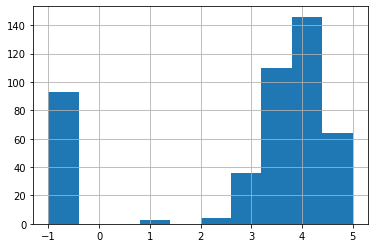

In [60]:
df.Rating.hist()

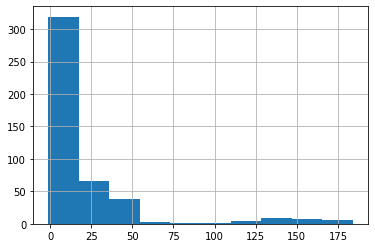

In [64]:
df.age.hist()

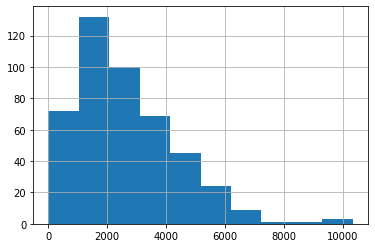

In [65]:
df.descr_length.hist()

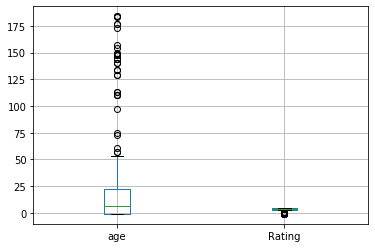

In [67]:
df.boxplot(column = ['age','Rating']) #add avg_salary in middle

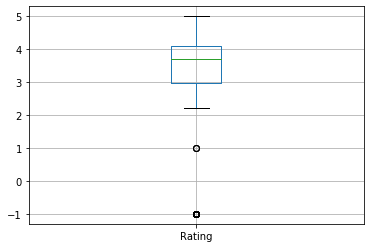

In [68]:
df.boxplot(column = ['Rating'])

In [70]:
#Correlation Plot 
df[['age','Rating','descr_length']].corr()

,age,Rating,descr_length
age,1.000000,0.257726,0.358916
Rating,0.257726,1.000000,0.163356
descr_length,0.358916,0.163356,1.000000


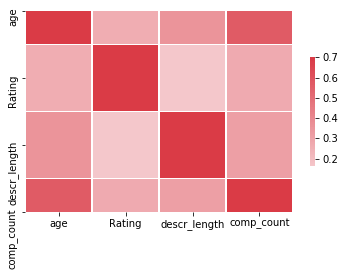

In [96]:
#Corr Plot using Seaborn is visually more appealing
#Making the plot more clear the below 1 line is used
cmap = sns.diverging_palette(220,10, as_cmap=True)
#Plotting
sns.heatmap(df[['age','Rating','descr_length','comp_count']].corr(),vmax=.7,center=0,cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [85]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'descr_length', 'comp_count'],
      dtype='object')

In [98]:
#Picking out only the Categorical data from the columns
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue',
             'company_txt','job_state','same_state','python_yn', 'R_yn','spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

Graph for Location:total = 35


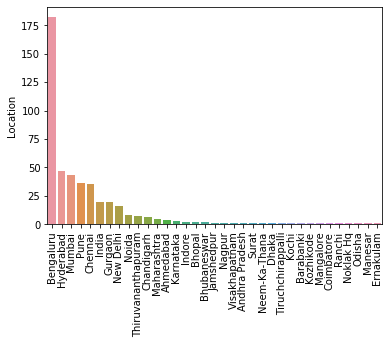

Graph for Headquarters:total = 139


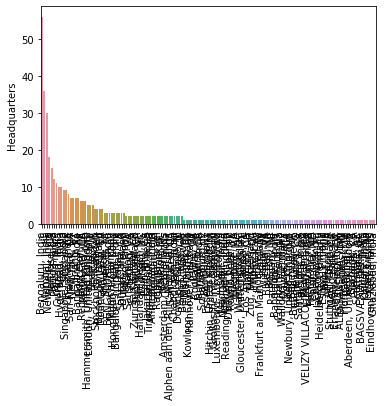

Graph for Size:total = 9


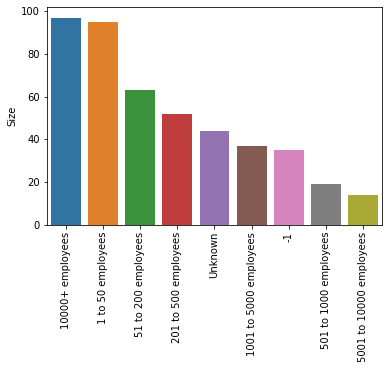

Graph for Type of ownership:total = 10


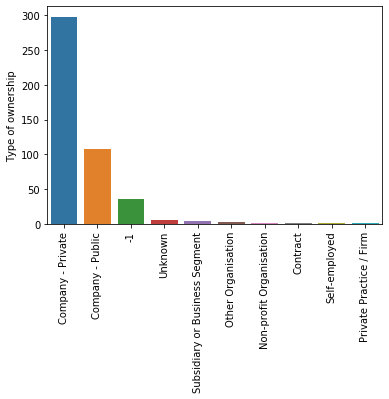

Graph for Industry:total = 47


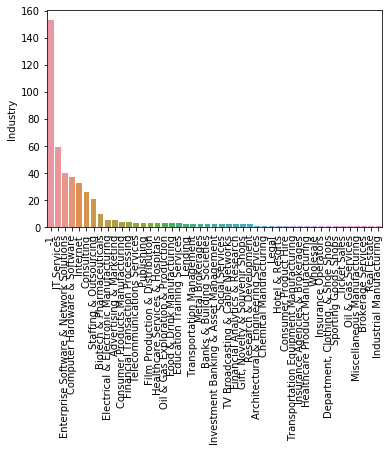

Graph for Sector:total = 21


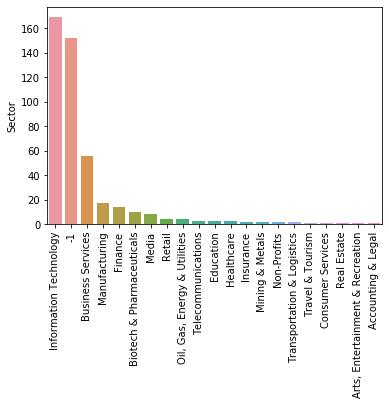

Graph for Revenue:total = 12


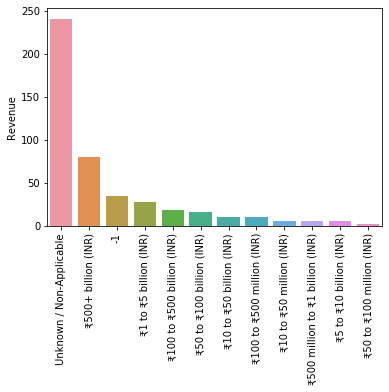

Graph for company_txt:total = 350


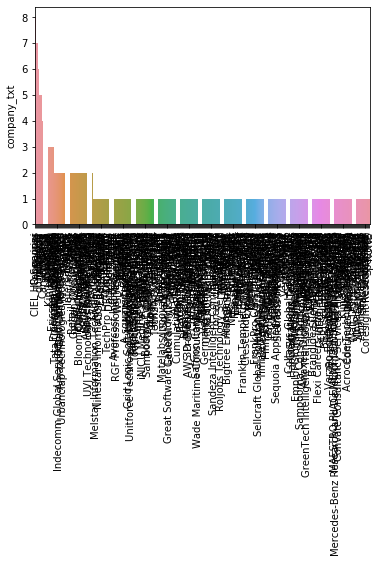

Graph for job_state:total = 35


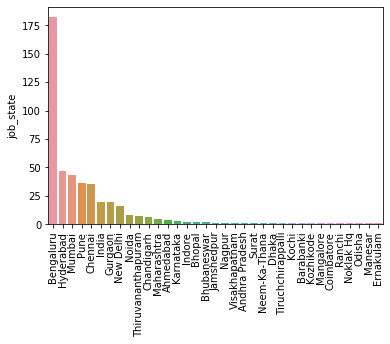

Graph for same_state:total = 1


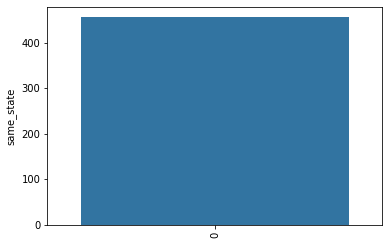

Graph for python_yn:total = 2


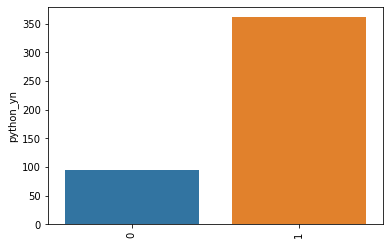

Graph for R_yn:total = 2


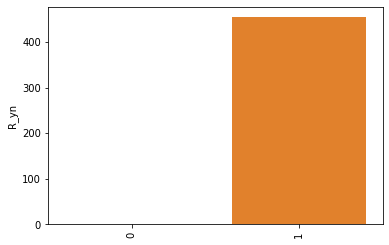

Graph for spark_yn:total = 2


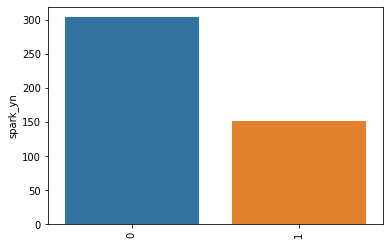

Graph for aws_yn:total = 2


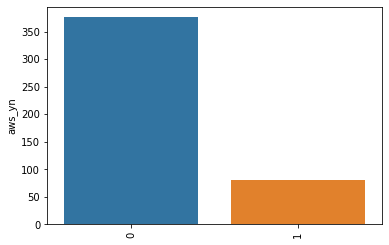

Graph for excel_yn:total = 2


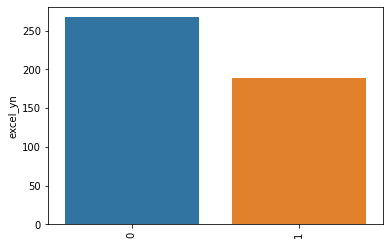

Graph for job_simp:total = 1


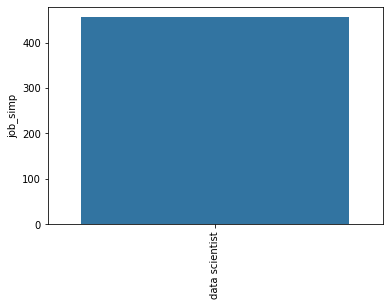

Graph for seniority:total = 3


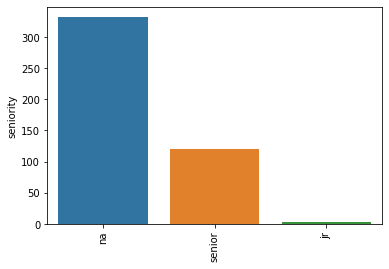

In [103]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s:total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location:total = 6


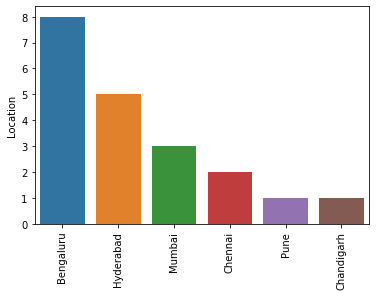

Graph for Headquarters:total = 20


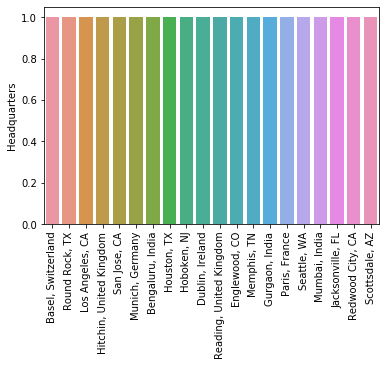

Graph for company_txt:total = 19


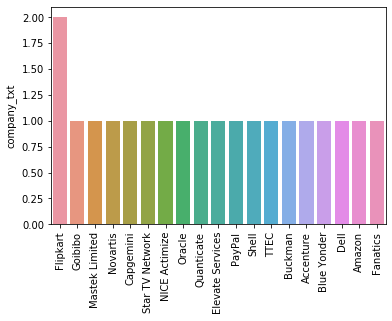

In [105]:
for i in df_cat[['Location','Headquarters','company_txt']].columns: #Picking only three fields which we want to focus
    cat_num = df_cat[i][:20].value_counts() #Taking only top 20 stats
    print("Graph for %s:total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


In [113]:
#Use this to plot salary observations when you create avg_salary
#pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

In [114]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [111]:
#pd.pivot_table(df, index='job_state', values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

In [112]:
#Filtering the data based only for 'Data Scientists' #By definition it sorts by the avg_salary
#pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)


60

In [124]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'comp_count', #'hourly', 
           #'employer_provided', 
            'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'descr_length', 'Type of ownership'#,'avg_salary'
            ]]



In [125]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'descr_length', 'comp_count'],
      dtype='object')

In [127]:
#To see which industry pays more
for i in df_pivots.columns:
    print(i)
    #print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
Industry
Sector
Revenue
comp_count
python_yn
R_yn
spark_yn
aws_yn
excel_yn
descr_length
Type of ownership


In [129]:
#Seeing big-small companies hiring data scientists
#pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

In [134]:
#Downloading all the packages to use the nltk package completely
# import nltk
#Below line to download all the packages of nltk
#nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloadin

[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/senseval.zip.
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/sentiwordnet.zip.
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/jagannathan/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package

True

In [146]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [145]:
#nltk.download('tokenize')

[nltk_data] Error loading token_size: Package 'token_size' not found
[nltk_data]     in index


False

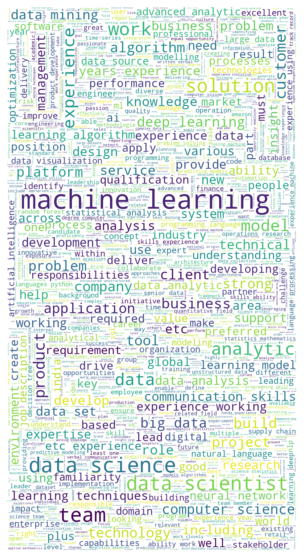

In [148]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()